In [2]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
# Importing the data

gold_p = pd.read_csv('gold_price/gld_price_data.csv')
gold_p.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# thus we have 10 years of data of gold prices
gold_p.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold_p.shape

(2290, 6)

In [7]:
gold_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# Does we have any missing data ?
gold_p.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# some stats measures
gold_p.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

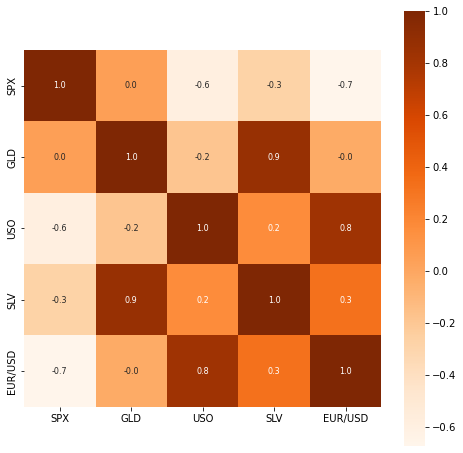

In [17]:
# plotting the correlations between the columns.
col_corr = gold_p.corr()
plt.figure(figsize=(8,8))
sns.heatmap(col_corr, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size':8}, cmap='Oranges')

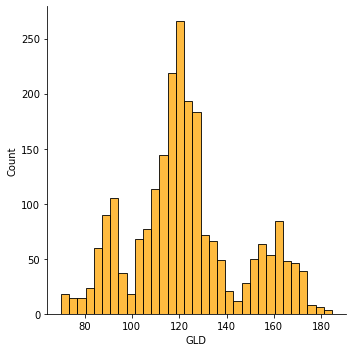

In [19]:
# the distribution of gold price 
sns.displot(gold_p['GLD'], color='orange')

In [20]:
# Splitting the features and the target.
X = gold_p.drop(['Date', 'GLD'], axis=1)
y = gold_p['GLD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [24]:
# let's make train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# let's train the model now.
reg = RandomForestRegressor(n_estimators=100)

In [28]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
# prediction
pred = reg.predict(X_test)

In [35]:
# let's get error score of our data
error = metrics.r2_score(y_test, pred)
print(f'R squared error is {error}')

R squared error is 0.9893579091182482


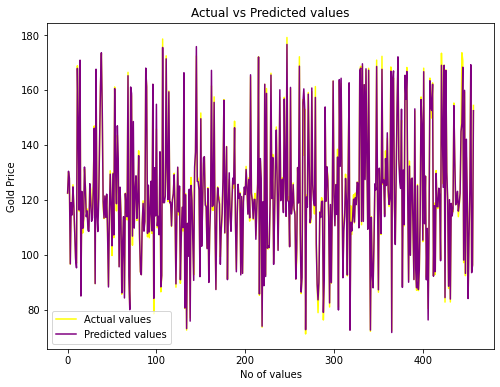

In [40]:
# plot for comparison between actual and predicted values.
y_test = list(y_test)
plt.figure(figsize=(8,6))
plt.plot(y_test, color='yellow', label='Actual values') # Actual values are in yellow
plt.plot(pred, color='purple', label='Predicted values') # predicted are in purple
plt.title('Actual vs Predicted values')
plt.xlabel('No of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Predicted values are plotted upon Actual values for comparison
# There is minor error , random_forest performed well.